In [1]:
from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [4]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()
#normalize the data
X_train = X_train/255
X_test = X_test/255
print(X_train.shape, 'train input samples')
print(X_test.shape, 'test input samples')
print(Y_train.shape, 'train output samples')
print(Y_test.shape, 'test output samples')

(50000, 32, 32, 3) train input samples
(10000, 32, 32, 3) test input samples
(50000, 1) train output samples
(10000, 1) test output samples


In [5]:
class_names = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

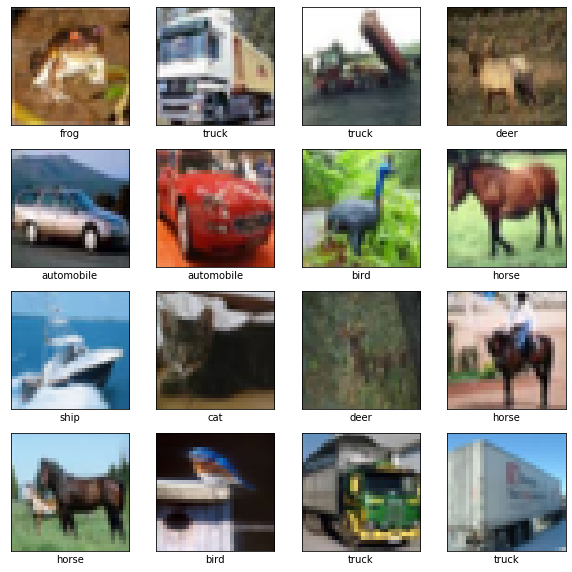

In [8]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [10]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [12]:
model.compile(optimizer=keras.optimizers.SGD(), loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
1563/1563 [==============================] - 11s 5ms/step - loss: 2.0217 - accuracy: 0.2561 - val_loss: 1.7503 - val_accuracy: 0.3683
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6190 - accuracy: 0.4147 - val_loss: 1.6666 - val_accuracy: 0.3924
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4451 - accuracy: 0.4817 - val_loss: 1.3562 - val_accuracy: 0.5220
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3329 - accuracy: 0.5231 - val_loss: 1.3222 - val_accuracy: 0.5262
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2471 - accuracy: 0.5599 - val_loss: 1.4034 - val_accuracy: 0.5030
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1748 - accuracy: 0.5868 - val_loss: 1.1938 - val_accuracy: 0.5760
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1095 - accuracy: 0.6106 - val_loss: 1.1230 - val_accuracy